### Observations:  
1. The values under the column 'AgeOfCar' are weakly right skewed.  
1. The values under the column 'Price' are strongly right skewed.  
1. The values under the column 'NoOfOwners' are unevenly distributed.  
1. There are no NaN values in the entire data frame.   
1. There are no null objects in the dataframe and there are 1 columns with object as the data type & 10 columns with numerical values.  
1. It is observed that only 3 values are weak moderately correlated with the Target variable, others being weakly correlated.  
1. It is observed that there is a strong non-linear relationship between 'OdoMeterReading' and 'Price'. The price of the vehicle is likely to be more if the Odometer Reading is less.  
1. It is observed that the highest amount of cars that has been listed belongs to "Maruti" brand, followed by "Hyundai" and "Mahindra". The lowest being "Kia", "Isuzu", "Force", etc.  
1. Majority of the cars have had no owners before.  
1. It is observed that majority of the cars run on "Diesel" and the least number of cars run "Battery (electric)".  
1. It is observed that majority of the cars are low priced.  
1. It is observed that majority of the cars are aged between 5-10 years  
1. It is observed that as the age of car increases, the price of car is likely to decrease.  
1. It is observed that as the price of a car is highest when it has no owners and lowest when it has 1 owner.

### Results:  
Following are the features that were used to predict the Price of a car:'AgeOfCar', 'Gas Type', 'NoOfOwners', 'Broker', 'Direct Owner', 'Manual', 'Automatic'. The model had an accuracy of 48.646% and an error rate of 2.651%.

### Code:

In [7]:
# Importing all the necessary libraries/modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import regex
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [8]:
# Importing the dataframe onto python
df = pd.read_excel("C:/Users/suman/OneDrive/Desktop/Christ/ML/car_price.xlsx")
df_initial = df.copy()
df

,CarModel,AgeOfCar,Price,OdoMeterReading,Unnamed: 4,DealingType,GearSystem,NoOfOwners
0,Ford Figo Aspire 1.5 TDCi Trend,8,574998.75,152620,Diesel,Broker,Manual,First Owner
1,Mahindra Scorpio SLE BSIV,11,656250.00,149000,Diesel,Direct Owner,Manual,First Owner
2,Tata Manza Club Class Quadrajet90 LS,9,250000.00,104000,Diesel,Direct Owner,Manual,First Owner
3,Toyota Corolla Altis 1.8 VL AT,13,437500.00,84000,Petrol,Direct Owner,Automatic,Third Owner
4,Tata Indigo CS eLS BS IV,12,225000.00,124000,Diesel,Direct Owner,Manual,First Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai EON Era,9,362500.00,16000,Petrol,Broker,Manual,First Owner
4336,Hyundai Grand i10 1.2 Kappa Asta,6,625000.00,54000,Petrol,Direct Owner,Manual,First Owner
4337,Maruti Ritz LXi,7,343750.00,164000,Petrol,Direct Owner,Manual,First Owner
4338,Honda Amaze VX Diesel BSIV,5,975000.00,36114,Diesel,Broker,Manual,First Owner


#### Data Wrangling

In [9]:
# --- renaming column 5 to an appropraite name ---
df.rename(columns = {'Unnamed: 4':'Gas Type'}, inplace = True)

In [10]:
df

,CarModel,AgeOfCar,Price,OdoMeterReading,Gas Type,DealingType,GearSystem,NoOfOwners
0,Ford Figo Aspire 1.5 TDCi Trend,8,574998.75,152620,Diesel,Broker,Manual,First Owner
1,Mahindra Scorpio SLE BSIV,11,656250.00,149000,Diesel,Direct Owner,Manual,First Owner
2,Tata Manza Club Class Quadrajet90 LS,9,250000.00,104000,Diesel,Direct Owner,Manual,First Owner
3,Toyota Corolla Altis 1.8 VL AT,13,437500.00,84000,Petrol,Direct Owner,Automatic,Third Owner
4,Tata Indigo CS eLS BS IV,12,225000.00,124000,Diesel,Direct Owner,Manual,First Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai EON Era,9,362500.00,16000,Petrol,Broker,Manual,First Owner
4336,Hyundai Grand i10 1.2 Kappa Asta,6,625000.00,54000,Petrol,Direct Owner,Manual,First Owner
4337,Maruti Ritz LXi,7,343750.00,164000,Petrol,Direct Owner,Manual,First Owner
4338,Honda Amaze VX Diesel BSIV,5,975000.00,36114,Diesel,Broker,Manual,First Owner


#### Feature Generation

In [11]:
df['Brand'] = 0

for i in range(len(df)):
    txt = df['CarModel'][i]
    x = regex.split('\s', txt)
    x = x[0]
    df['Brand'][i] = x

C:\Users\suman\AppData\Local\Temp\ipykernel_8912\2575192957.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brand'][i] = x


#### Label Encoding

In [12]:
def groupBy(list_one, list_two): 
    group_by = {}

    for i in range(len(list_one)):
        group_by[list_one[i]] = list_two[i]
    return group_by

In [13]:
# --- Label Encoding 'Gas Type' ---

initial_gas = df['Gas Type'].unique()

gasType_le = LabelEncoder()
df['Gas Type'] = gasType_le.fit_transform(df['Gas Type'])

final_gas = df['Gas Type'].unique()

In [14]:
groupBy(initial_gas, final_gas)

{'Diesel': 1, 'Petrol': 4, 'CNG': 0, 'Electric': 2, 'LPG': 3}

In [15]:
# --- Label Encoding 'NoOfOwners' ---

initial_owners = df['NoOfOwners'].unique()

owners_le = LabelEncoder()
df['NoOfOwners'] = owners_le.fit_transform(df['NoOfOwners'])

final_owners = df['NoOfOwners'].unique()

In [16]:
groupBy(initial_owners, final_owners)

{'First Owner': 0,
 'Third Owner': 4,
 'Second Owner': 2,
 'Fourth & Above Owner': 1,
 'Test Drive Car': 3}

In [17]:
# --- Label Encoding 'NoOfOwners' ---

initial_brand = df['Brand'].unique()

brand_le = LabelEncoder()
df['Brand Encoded'] = brand_le.fit_transform(df['Brand'])

final_brand = df['Brand Encoded'].unique()

In [18]:
groupBy(initial_brand, final_brand)

{'Ford': 8,
 'Mahindra': 17,
 'Tata': 25,
 'Toyota': 26,
 'Skoda': 24,
 'Hyundai': 10,
 'Maruti': 18,
 'Datsun': 5,
 'Honda': 9,
 'Renault': 23,
 'Mitsubishi': 20,
 'Nissan': 21,
 'Volkswagen': 27,
 'Chevrolet': 3,
 'BMW': 2,
 'Jeep': 13,
 'Audi': 1,
 'Mercedes-Benz': 19,
 'Fiat': 6,
 'Volvo': 28,
 'Kia': 14,
 'Ambassador': 0,
 'Land': 15,
 'Jaguar': 12,
 'OpelCorsa': 22,
 'MG': 16,
 'Isuzu': 11,
 'Force': 7,
 'Daewoo': 4}

#### One Hot Encoding

In [19]:
# --- One-Hot Encoding 'DealingType' ---

one_hot_encoder_dealing = OneHotEncoder()
dealing_reshaped = np.array(df['DealingType']).reshape(-1, 1)
dealing_values = one_hot_encoder_dealing.fit_transform(dealing_reshaped)

dealing_col = df['DealingType'].unique()
dealing_df = pd.DataFrame(dealing_values.toarray(), columns = dealing_col)
  
df = pd.concat([df, dealing_df], axis = 1)
df = df.drop(['DealingType'], axis = 1)

In [20]:
# --- One-Hot Encoding 'GearSystem' ---

one_hot_encoder_gear = OneHotEncoder()
gear_reshaped = np.array(df['GearSystem']).reshape(-1, 1)
gear_values = one_hot_encoder_gear.fit_transform(gear_reshaped)

gear_col = df['GearSystem'].unique()
gear_df = pd.DataFrame(gear_values.toarray(), columns = gear_col)
  
df = pd.concat([df, gear_df], axis = 1)
df = df.drop(['GearSystem'], axis = 1)

# Scaling

In [21]:
# --- MinMax Scaling 'Price' ---
scaler_one = MinMaxScaler()
df['Price'] = scaler_one.fit_transform(df[['Price']])

In [22]:
# --- Standard Scaling 'OdoMeterReading' ---
scaler_two = StandardScaler()
df['OdoMeterReading'] = scaler_two.fit_transform(df[['OdoMeterReading']])

In [23]:
df

,CarModel,AgeOfCar,Price,OdoMeterReading,Gas Type,NoOfOwners,Brand,Brand Encoded,Broker,Direct Owner,Trustmark Broker,Manual,Automatic
0,Ford Figo Aspire 1.5 TDCi Trend,8,0.049549,1.766863,1,0,Ford,8,1.0,0.0,0.0,0.0,1.0
1,Mahindra Scorpio SLE BSIV,11,0.056869,1.689245,1,0,Mahindra,17,0.0,1.0,0.0,0.0,1.0
2,Tata Manza Club Class Quadrajet90 LS,9,0.020270,0.724381,1,0,Tata,25,0.0,1.0,0.0,0.0,1.0
3,Toyota Corolla Altis 1.8 VL AT,13,0.037162,0.295553,4,4,Toyota,26,0.0,1.0,0.0,1.0,0.0
4,Tata Indigo CS eLS BS IV,12,0.018018,1.153209,1,0,Tata,25,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai EON Era,9,0.030405,-1.162463,4,0,Hyundai,10,1.0,0.0,0.0,0.0,1.0
4336,Hyundai Grand i10 1.2 Kappa Asta,6,0.054054,-0.347689,4,0,Hyundai,10,0.0,1.0,0.0,0.0,1.0
4337,Maruti Ritz LXi,7,0.028716,2.010866,4,0,Maruti,18,0.0,1.0,0.0,0.0,1.0
4338,Honda Amaze VX Diesel BSIV,5,0.085586,-0.731190,1,0,Honda,9,1.0,0.0,0.0,0.0,1.0


In [24]:
# --- Exporting the cleaned dataframe ---

df.to_csv('21112016_Lab1_ProcessedDataset.csv')

#### Statistical Analysis

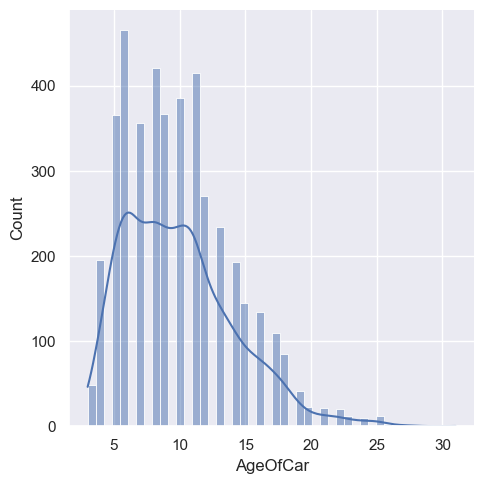

In [25]:
# --- Spread of 'AgeOfCar' ---
sns.set(rc={'figure.figsize':(7, 7)})
sns.displot(data = df, x = 'AgeOfCar', kde = True)

*Inference*: The values under the column 'AgeOfCar' are weakly right skewed.

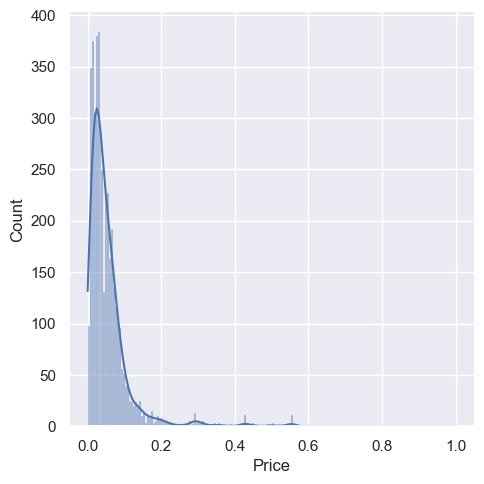

In [26]:
# --- Spread of 'Price' ---
sns.set(rc={'figure.figsize':(7, 7)})
sns.displot(data = df, x = 'Price', kde = True)
plt.show()

*Inference*: The values under the column 'Price' are strongly right skewed.

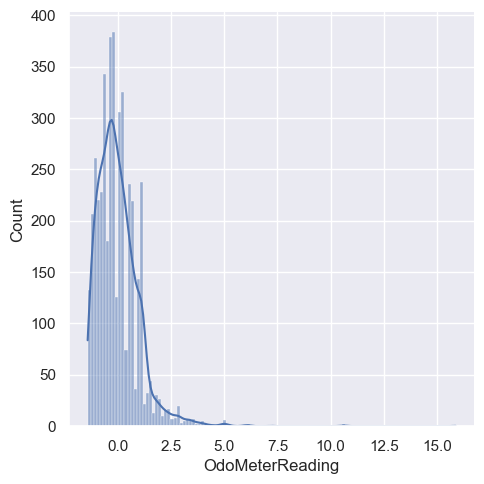

In [27]:
# --- Spread of 'OdoMeterReading' ---
sns.set(rc={'figure.figsize':(7, 7)})
sns.displot(data = df, x = 'OdoMeterReading', kde = True)
plt.show()

*Inference*: The values under the column 'OdoMeterReading' are strongly right skewed.

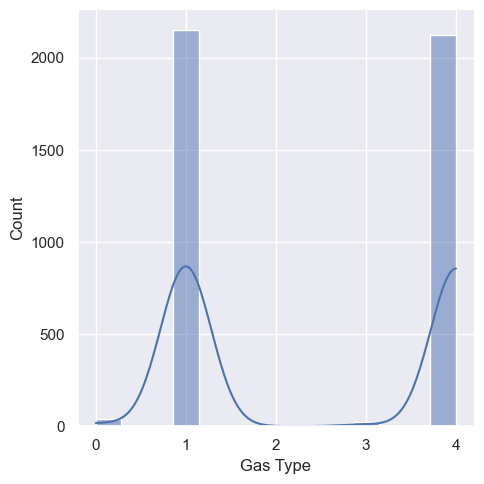

In [28]:
# Spread of 'Gas Type'
sns.displot(df, x = 'Gas Type', kde=True)
plt.show()

*Inference*: It is observed that there are very less vehicles with "electric" or "LPG" as their fuel type in the dataframe, with the majorities being "Petrol" and "Diesel".

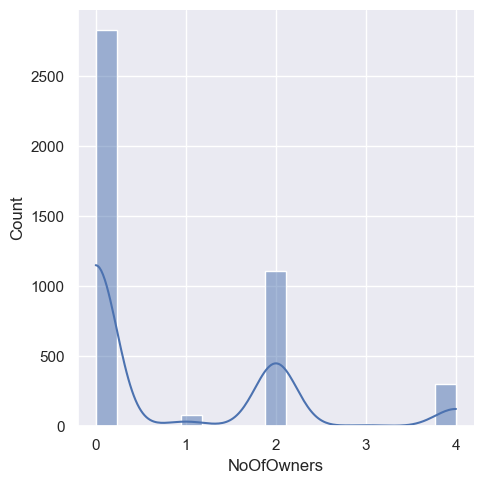

In [29]:
# --- Spread of 'NoOfOwners' ---
sns.set(rc={'figure.figsize':(7, 7)})
sns.displot(data = df, x = 'NoOfOwners', kde = True)
plt.show()

*Inference*: The values under the column 'NoOfOwners' are unevenly distributed.

In [30]:
# --- Statistical Summary ---
df.describe()

,AgeOfCar,Price,OdoMeterReading,Gas Type,NoOfOwners,Brand Encoded,Broker,Direct Owner,Trustmark Broker,Manual,Automatic
count,4340.000000,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,9.909217,0.054519,-7.776677e-18,2.469124,0.820276,15.561060,0.229032,0.747465,0.023502,0.103226,0.896774
std,4.215344,0.065152,1.000115e+00,1.508435,1.233494,6.810185,0.420258,0.434516,0.151510,0.304289,0.304289
min,3.000000,0.000000,-1.419738e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.021256,-6.693102e-01,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,9.000000,0.037162,-1.332750e-01,1.000000,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,12.000000,0.065315,5.099672e-01,4.000000,2.000000,18.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,31.000000,1.000000,1.587486e+01,4.000000,4.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# --- Checking for NaN values in each column ---
df.isnull().sum()

CarModel            0
AgeOfCar            0
Price               0
OdoMeterReading     0
Gas Type            0
NoOfOwners          0
Brand               0
Brand Encoded       0
Broker              0
Direct Owner        0
Trustmark Broker    0
Manual              0
Automatic           0
dtype: int64

*Inference*: There are no NaN values in the entire data frame.

In [32]:
# -- Basic info on the dataframe ---
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarModel          4340 non-null   object 
 1   AgeOfCar          4340 non-null   int64  
 2   Price             4340 non-null   float64
 3   OdoMeterReading   4340 non-null   float64
 4   Gas Type          4340 non-null   int32  
 5   NoOfOwners        4340 non-null   int32  
 6   Brand             4340 non-null   object 
 7   Brand Encoded     4340 non-null   int32  
 8   Broker            4340 non-null   float64
 9   Direct Owner      4340 non-null   float64
 10  Trustmark Broker  4340 non-null   float64
 11  Manual            4340 non-null   float64
 12  Automatic         4340 non-null   float64
dtypes: float64(7), int32(3), int64(1), object(2)
memory usage: 390.0+ KB


*Inference*: There are no null objects in the dataframe and there are 1 columns with object as the data type & 10 columns with numerical values.

In [33]:
# -- Number of unique values in each column ---
df.T.apply(lambda x: x.nunique(), axis=1)

CarModel            1491
AgeOfCar              27
Price                445
OdoMeterReading      770
Gas Type               5
NoOfOwners             5
Brand                 29
Brand Encoded         29
Broker                 2
Direct Owner           2
Trustmark Broker       2
Manual                 2
Automatic              2
dtype: int64

####  EDA  
<br>  
1. What factors affect the price of a car? <br>
2. Which brand has the highest number of car listing? <br>
3. Which brand has the lowest number of car listing? <br>

C:\Users\suman\AppData\Local\Temp\ipykernel_8912\2814082832.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), annot=True)


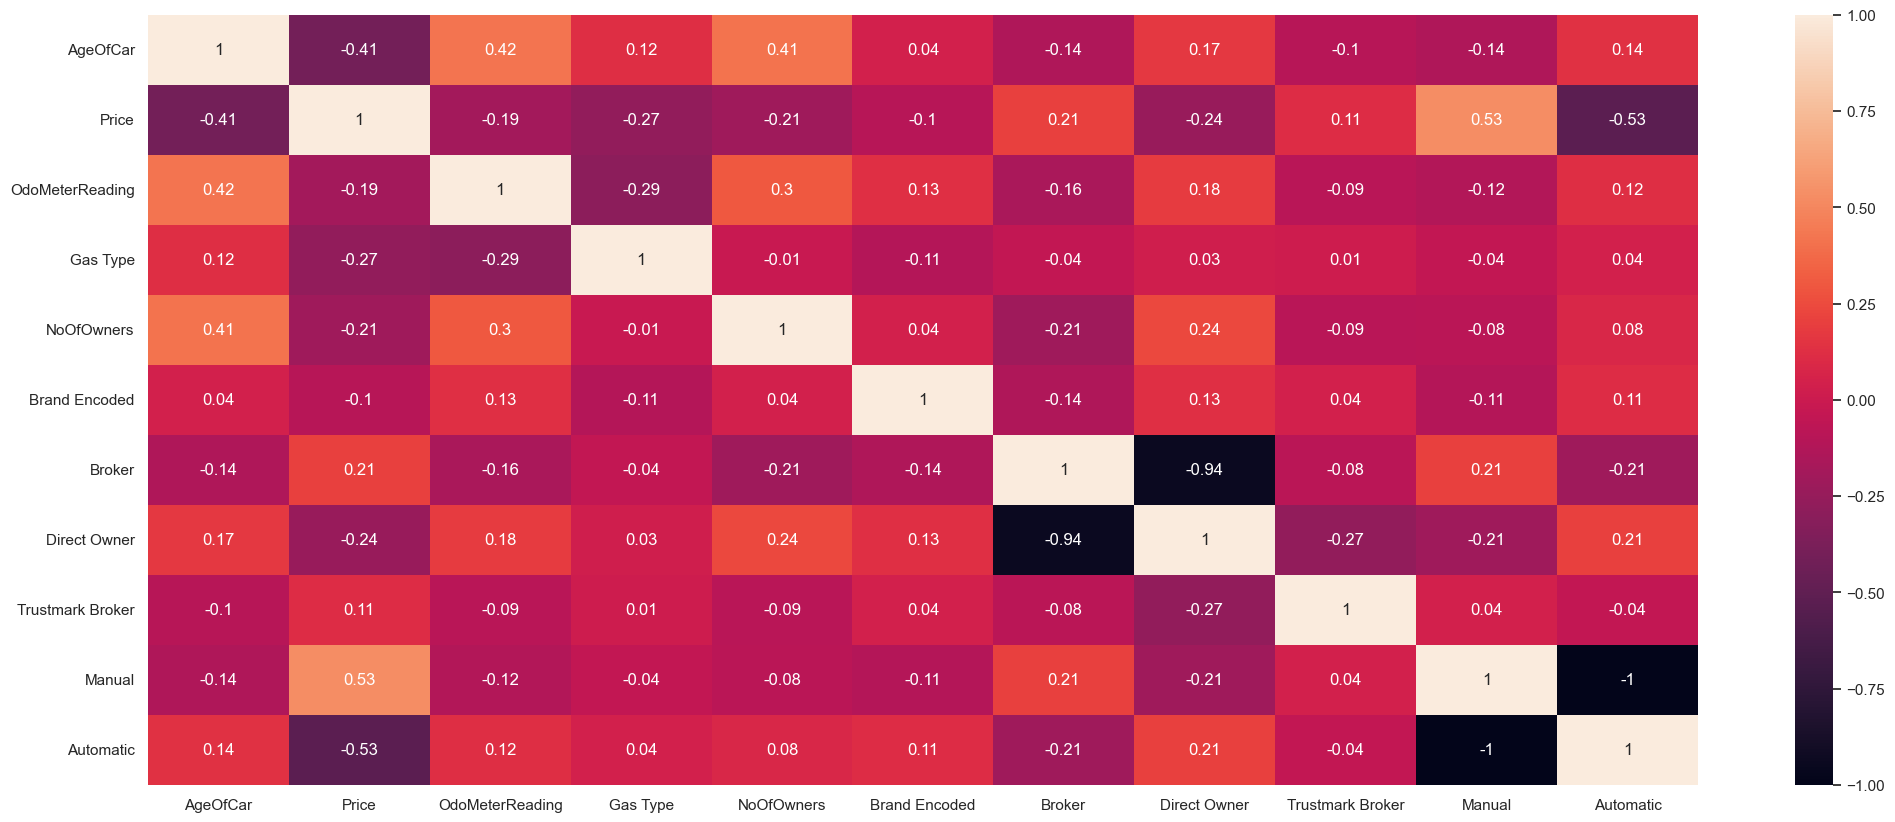

In [34]:
# --- correlation heatmap ---
sns.set(rc={'figure.figsize':(25, 10)})
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

*Inference*: It is observed that only 3 values are weak moderately correlated with the Target variable, others being weakly correlated.

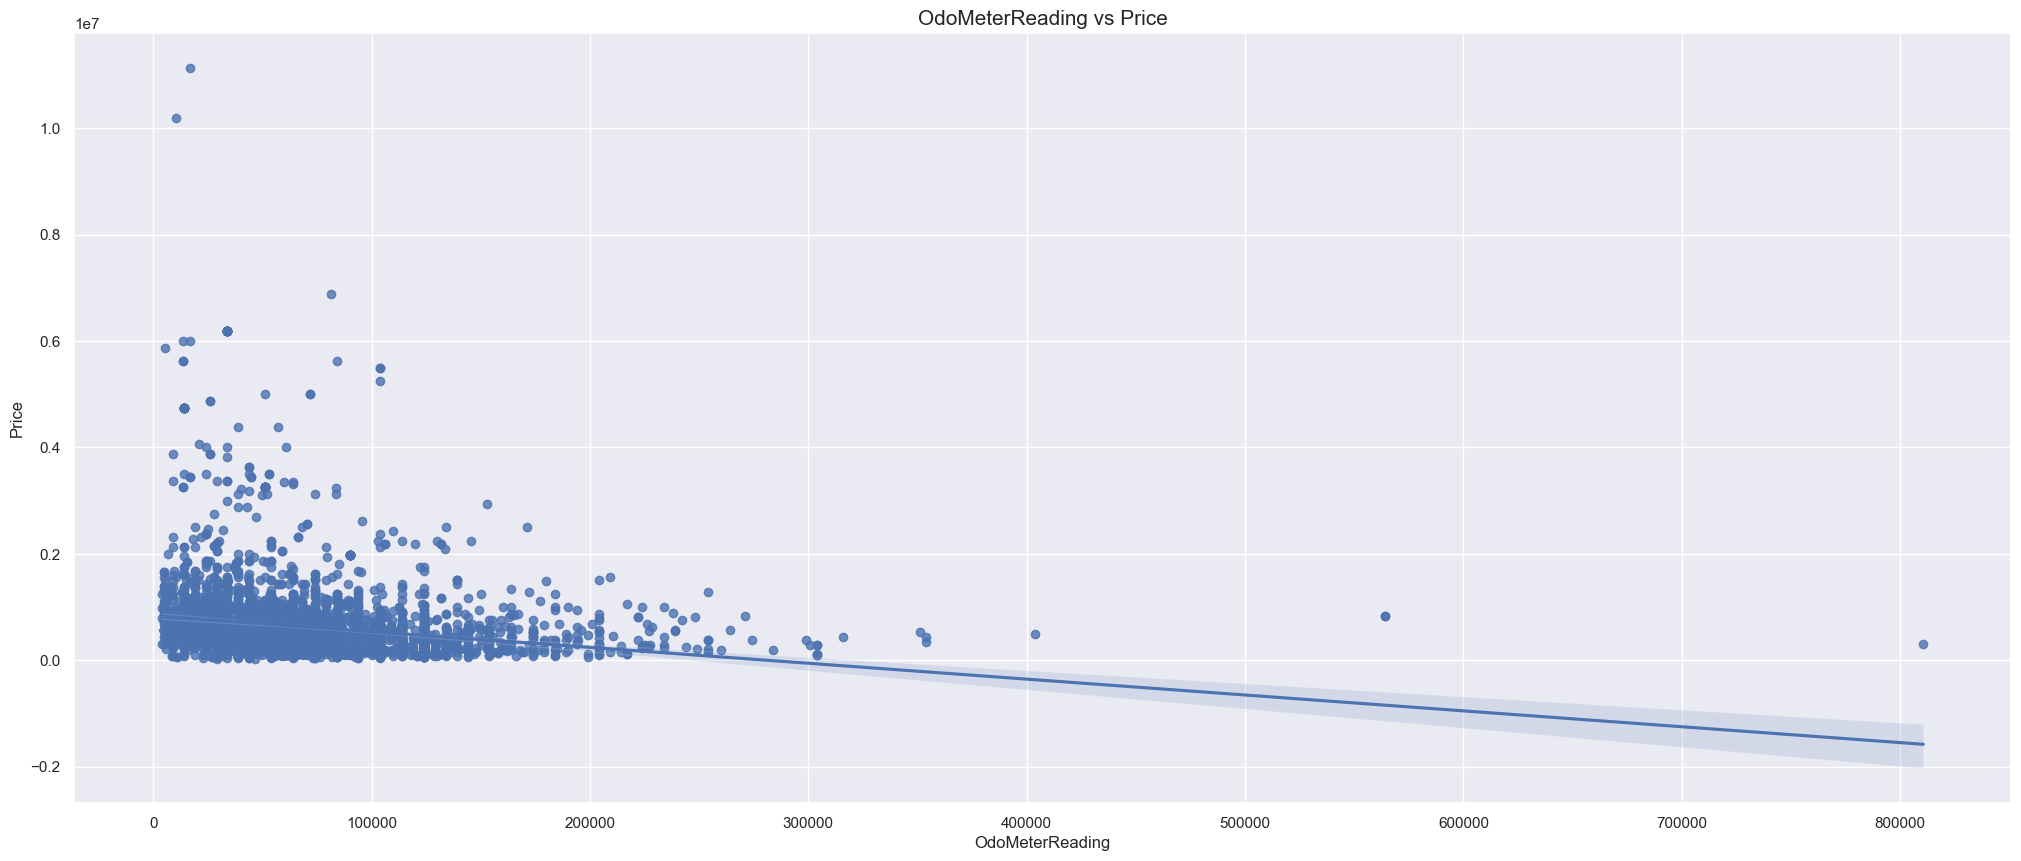

In [35]:
# --- OdoMeterReading vs Price (regplot) ---
sns.regplot(data = df_initial, x = 'OdoMeterReading', y = 'Price', label = 'OdoMeterReading vs Price')
plt.title('OdoMeterReading vs Price', fontsize = 15)
plt.show()

*Inference*: It is observed that there is a strong non-linear relationship between 'OdoMeterReading' and 'Price'. The price of the vehicle is likely to be more if the Odometer Reading is less.

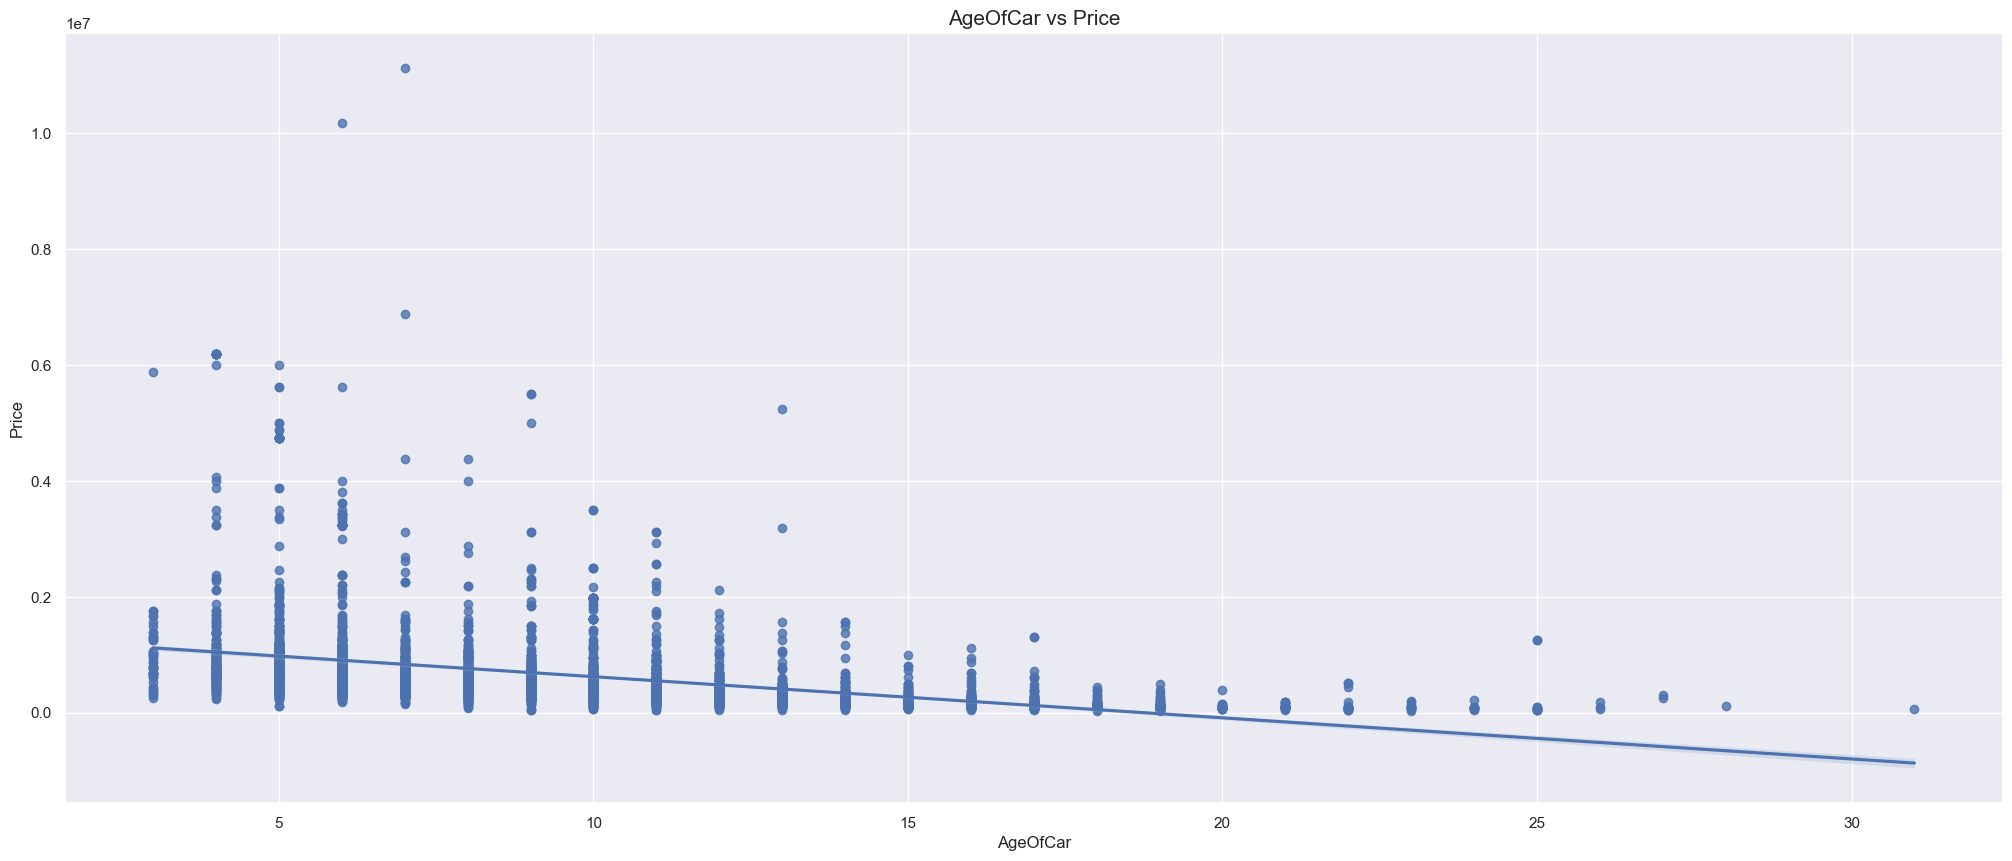

In [36]:
# --- AgeOfCar vs Price (regplot) ---
sns.regplot(data = df_initial, x = 'AgeOfCar', y = 'Price', label = 'AgeOfCar vs Price')
plt.title('AgeOfCar vs Price', fontsize = 15)
plt.show()

*Inference*: It is observed that as the age of car increases, the price of car is likely to decrease.

In [37]:
# --- Count of each Brand ---

brand_data = []
for i in range(len(initial_brand)):
    brand_data.append(len(df[df['Brand'] == initial_brand[i]]))

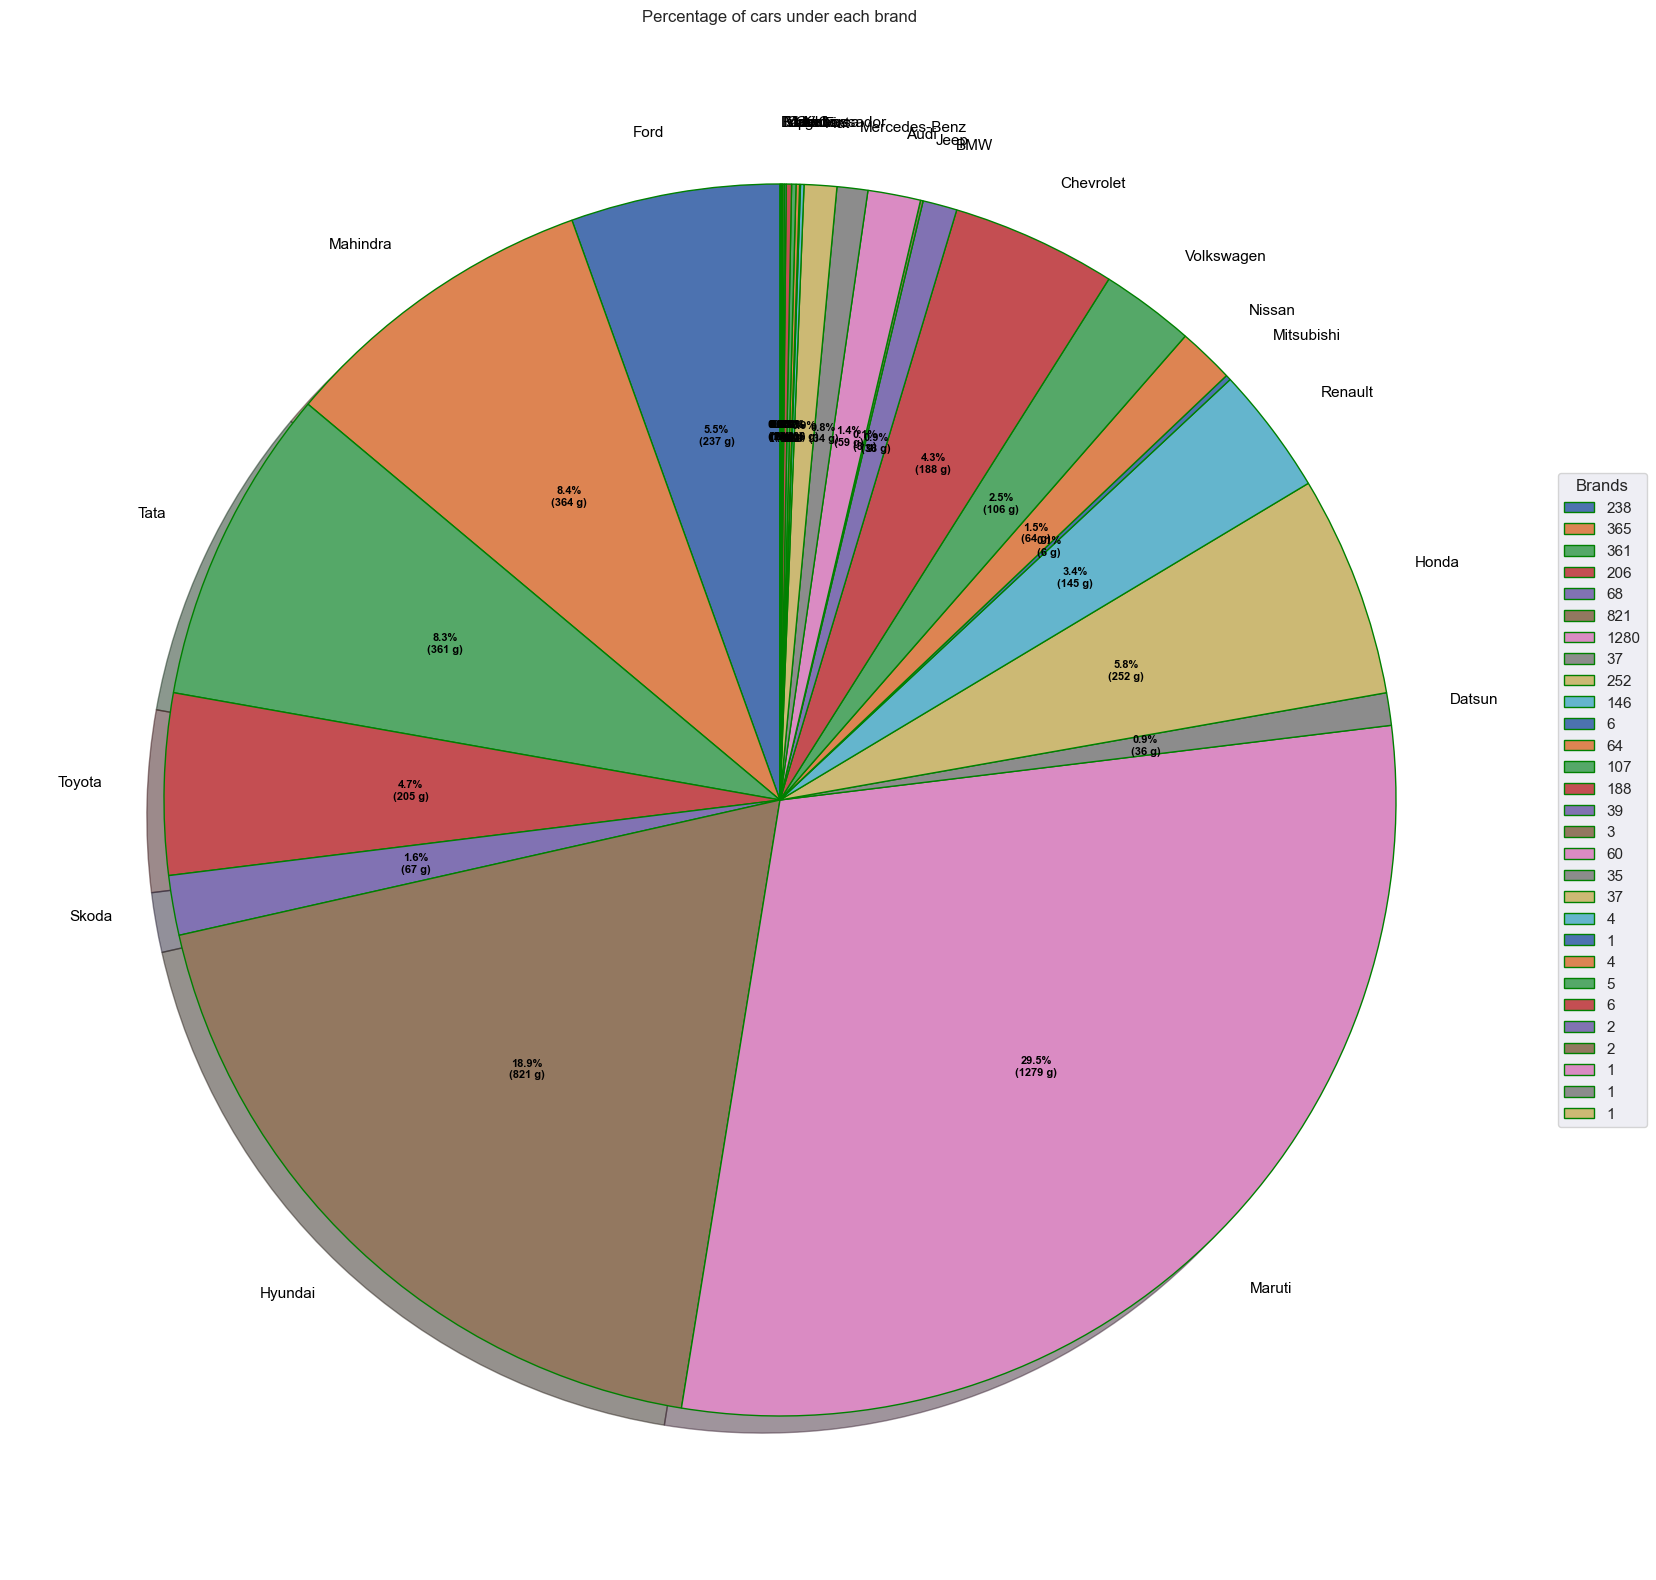

In [38]:
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(35, 20))
wedges, texts, autotexts = ax.pie(brand_data,
                                  autopct = lambda pct: func(pct, brand_data),
                                  labels = initial_brand,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, brand_data,
          title = "Brands",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight = "bold")
ax.set_title("Percentage of cars under each brand")
 
# show plot
plt.show()

*Inference*: It is observed that the highest amount of cars that has been listed belongs to "Maruti" brand, followed by "Hyundai" and "Mahindra". The lowest being "Kia", "Isuzu", "Force", etc.

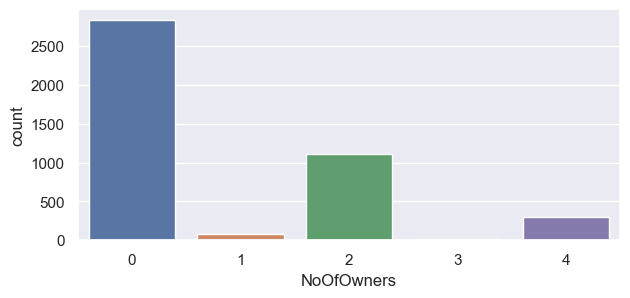

In [39]:
# --- Spread of 'NoOfOwners' ---
sns.set(rc={'figure.figsize':(7, 3)})
sns.countplot(data = df, x = 'NoOfOwners')
plt.show()

*Inference*: Majority of the cars have had no owners before.

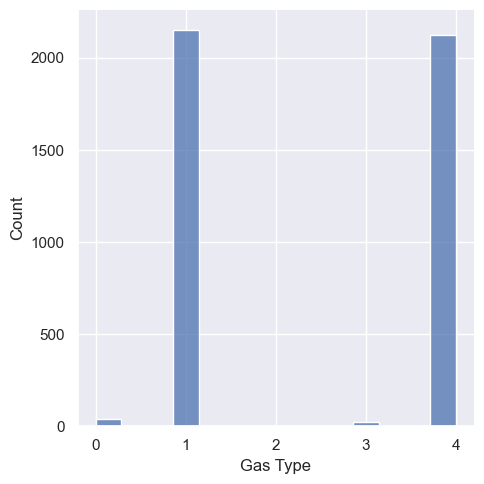

In [40]:
# Spread of 'Gas Type'
sns.displot(df, x = 'Gas Type')
plt.show()

In [41]:
def countUnique(df, unique_list, column):
    count_unique = {}

    for i in range(len(unique_list)):
        k = 0
        for j in range(len(df[column])):
            if df[column][j] == unique_list[i]:
                k += 1
        count_unique[unique_list[i]] = k
    return count_unique

In [42]:
countUnique(df, final_gas, 'Gas Type')

{1: 2153, 4: 2123, 0: 40, 2: 1, 3: 23}

In [43]:
groupBy(initial_gas, final_gas)

{'Diesel': 1, 'Petrol': 4, 'CNG': 0, 'Electric': 2, 'LPG': 3}

*Inference*: It is observed that majority of the cars run on "Diesel" and the least number of cars run "Battery (electric)".

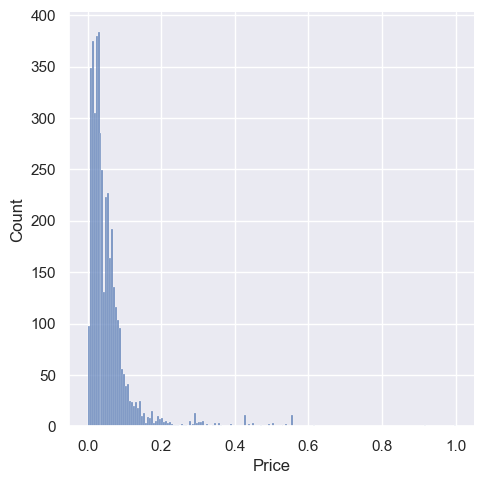

In [44]:
# --- Spread of 'Price' ---
sns.set(rc={'figure.figsize':(7, 7)})
sns.displot(data = df, x = 'Price')
plt.show()

*Inference*: It is observed that majority of the cars are low priced.

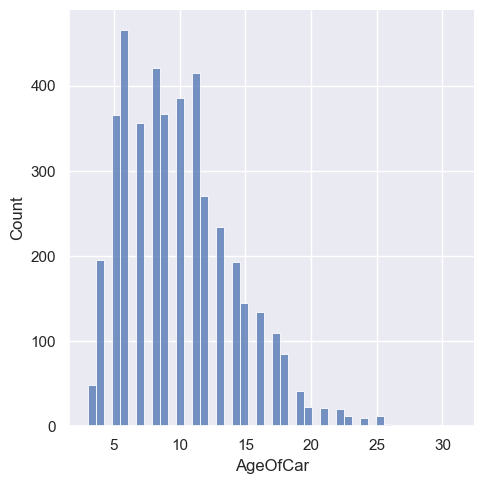

In [45]:
# --- Spread of 'AgeOfCar' ---
sns.set(rc={'figure.figsize':(7, 7)})
sns.displot(data = df, x = 'AgeOfCar')
plt.show()

*Inference*: It is observed that majority of the cars are aged between 5-10 years

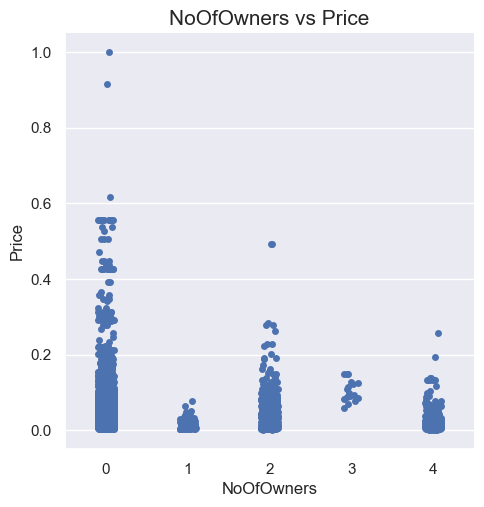

In [46]:
# --- NoOfOwners vs Price (catplot) ---
sns.catplot(data = df, x = 'NoOfOwners', y = 'Price', label = 'NoOfOwners vs Price')
plt.title('NoOfOwners vs Price', fontsize = 15)
plt.show()

*Inference*: It is observed that as the price of a car is highest when it has no owners and lowest when it has 1 owner.

####  Linerar Regression

In [47]:
# --- Feature Selection ---
corr_matrix = df.corr()

features = []
for feature, value in corr_matrix['Price'].iteritems():
    if abs(value) >= 0.2:
        features.append(feature)
    else:
        pass

C:\Users\suman\AppData\Local\Temp\ipykernel_8912\1697541783.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
C:\Users\suman\AppData\Local\Temp\ipykernel_8912\1697541783.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature, value in corr_matrix['Price'].iteritems():


In [48]:
features.pop(1)

'Price'

In [49]:
print("Features:", features)

Features: ['AgeOfCar', 'Gas Type', 'NoOfOwners', 'Broker', 'Direct Owner', 'Manual', 'Automatic']


In [50]:
# Splitting the data into Features and Targets

X = df[features] 
y = df['Price'] 

# X --> Features
# y --> Target Variable

In [51]:
# Splitting the data into training data and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
linear_regressor = LinearRegression()

In [52]:
X_train

,AgeOfCar,Gas Type,NoOfOwners,Broker,Direct Owner,Manual,Automatic
330,6,1,0,0.0,1.0,1.0,0.0
3022,6,1,0,0.0,1.0,0.0,1.0
2497,5,4,0,0.0,1.0,0.0,1.0
2078,4,1,0,0.0,1.0,0.0,1.0
1837,8,1,0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
1033,15,4,2,0.0,1.0,0.0,1.0
3264,16,4,2,0.0,1.0,0.0,1.0
1653,10,1,4,0.0,1.0,0.0,1.0
2607,10,1,4,0.0,1.0,0.0,1.0


In [53]:
X_test

,AgeOfCar,Gas Type,NoOfOwners,Broker,Direct Owner,Manual,Automatic
2089,10,1,0,1.0,0.0,1.0,0.0
1077,8,4,0,0.0,1.0,0.0,1.0
1495,8,1,0,0.0,1.0,0.0,1.0
555,10,1,0,0.0,1.0,0.0,1.0
2615,5,4,0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
2933,6,1,0,0.0,1.0,0.0,1.0
4181,9,1,0,0.0,1.0,0.0,1.0
3326,4,1,0,1.0,0.0,1.0,0.0
628,4,4,0,0.0,1.0,1.0,0.0


In [54]:
y_train

330     0.504505
3022    0.138514
2497    0.038288
2078    0.104730
1837    0.046171
          ...   
1033    0.011261
3264    0.007883
1653    0.014640
2607    0.063063
2732    0.010698
Name: Price, Length: 3038, dtype: float64

In [55]:
y_test

2089    0.144144
1077    0.019144
1495    0.078266
555     0.065315
2615    0.031532
          ...   
2933    0.078829
4181    0.031532
3326    0.555180
628     0.080856
422     0.110360
Name: Price, Length: 1302, dtype: float64

In [56]:
# Fitting the Data
linear_regressor.fit(X_train, y_train)

# Predicting the Target Variable
y_pred = linear_regressor.predict(X_test)

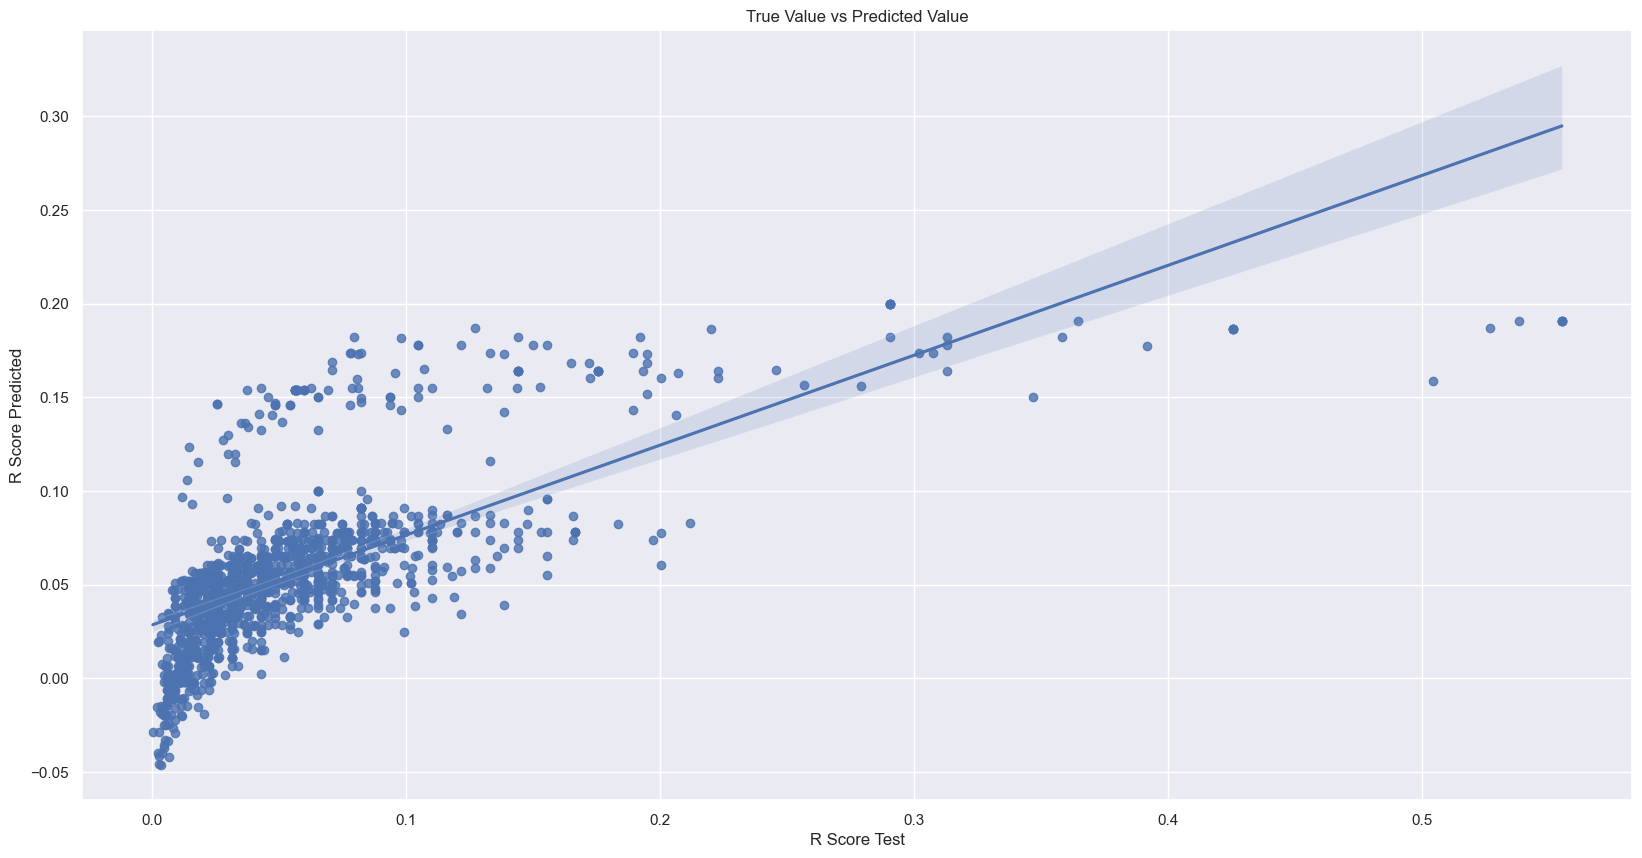

In [61]:
# Plotting the true and predicted value 
fig = plt.figure(figsize =(20, 10))
sns.regplot(x = y_test, y = y_pred)
plt.xlabel("R Score Test")
plt.ylabel("R Score Predicted")
plt.title("True Value vs Predicted Value")
plt.show()

In [62]:
# Chcking the accuracy of the model 
print("The accuracy of the model is", linear_regressor.score(X_test, y_test))
print("The r2 score of the model is", r2_score(y_test, y_pred))

The accuracy of the model is 0.4864680697287129
The r2 score of the model is 0.4864680697287129


In [63]:
# Evaluation Metrics
print("The Absolute Mean Error of the model is", mean_absolute_error(y_test, y_pred))
print("The Mean Squared Error of the model is", mean_squared_error(y_test, y_pred))

The Absolute Mean Error of the model is 0.026234121056608946
The Mean Squared Error of the model is 0.002096516520368421


In [64]:
# Intercept of the model
intercept = linear_regressor.intercept_

# Coefficeints of the model
m = linear_regressor.coef_

In [65]:
print("The intercept of the model is", intercept, "\n\nThe weights of the features are as follows:\n", m)

The intercept of the model is 0.18567303779778244 

The weights of the features are as follows:
 [-0.00443544 -0.00922798 -0.00196546 -0.01782432 -0.02606489  0.04978684
 -0.04978684]


<hr>

#### Deployment

In [66]:
# Saving the weights
pickle.dump(gasType_le, open("gasType_le.pickle", 'wb'))
pickle.dump(owners_le, open("owners_le.pickle", 'wb'))
pickle.dump(brand_le, open("brand_le.pickle", 'wb'))
pickle.dump(one_hot_encoder_dealing, open("one_hot_encoder_dealing.pickle", 'wb'))
pickle.dump(one_hot_encoder_gear, open("one_hot_encoder_gear.pickle", 'wb'))
pickle.dump(scaler_one, open("scaler_one.pickle", 'wb'))
pickle.dump(scaler_two, open("scaler_two.pickle", 'wb'))
pickle.dump(linear_regressor, open("linear_regressor.pickle", 'wb'))

In [ ]:
pickle.dump(linear_regressor, open("linear_regressor.pickle", 'wb'))